<a href="https://colab.research.google.com/github/farhanasajeer/correlation-regression/blob/main/bodyfatCORR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('/content/drive/MyDrive/bodyfat.csv')

In [3]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
data.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

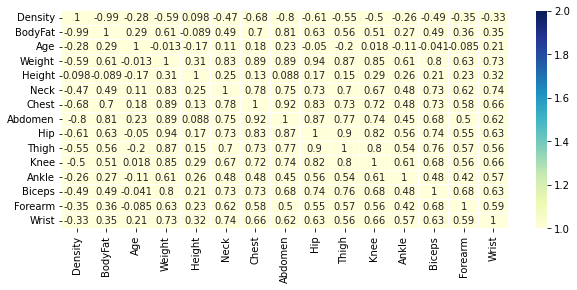

In [5]:
# find the correlation using corr function

corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=2, vmax=1, annot=True,linewidths=0.2,cmap='YlGnBu')

In [7]:
x=data.drop('BodyFat',axis=1)
y=data['BodyFat']

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [9]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)

In [10]:
predictions=model.predict(x_test)

In [11]:
print(y_test)

165    19.2
6      19.2
111    28.0
172    20.5
115    16.7
       ... 
193    24.7
249    29.3
170     3.0
126    27.2
97     11.3
Name: BodyFat, Length: 63, dtype: float64


In [12]:
print(predictions)

[19.55951423 19.23230043 27.53914229 20.46309724 16.61739359 12.21364889
 22.41642232 19.31643835 11.77750607 11.07868412 26.89052818 24.77484394
 15.43316173 21.9338694   6.75748189  5.25803385 21.08218741 20.55926828
 20.58975301 13.36620071 15.5829092  17.34419038 14.42258722 13.74406942
 21.76177533 31.13404671 24.4156929  15.41475356  7.26558689 13.52226325
 24.67610729 10.64828701 17.74602027 19.34624008 19.28125379  3.96508773
 21.29659832 16.03948082 17.15694504 11.57682582 14.12688739 24.02952296
 30.13857064  9.15311329 13.89974776 22.00497892 28.13834339 21.06632094
 23.17634433  9.87380946 37.74914804 21.21279381 23.3830585  34.89730926
 13.75192141 28.6642806  10.7488644  12.63890487 25.14585901 30.00812414
  3.44185146 26.46041601 11.63180872]


In [13]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,predictions))

MSC is: 0.39713825940380026
